# Sparse evolution 2D notebook demo

This notebook is an interactive tutorial about how to use the Sparse Evolution deconvolution algorithm in 2D

## Simple example

Bellow an example of how to run ATLAS

In [1]:
import sys
sys.path.append('../../allgo')

import allgo as ag
print(ag.__version__)
print(ag.__file__)

import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

import ntpath
from IPython.display import clear_output

0.2.0
../../allgo/allgo/__init__.py


## Load the data

In this section we load the data and display it in a interactive viewer

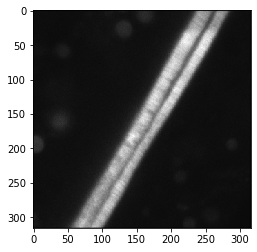

In [2]:
# visualize input image
input_image_path = '../Data/svdeconv.tif'
input_image = imageio.imread(input_image_path)
plt.imshow(input_image,cmap='gist_gray')

## Connection to Allgo 

In [4]:
token = None # put your token.
client = ag.Client(token)
print("You have got a connexion to {}".format(client.allgo_url))

You have got a connexion to https://allgo18.inria.fr


## Interactive parameters selection

In [5]:
output_image = None

def run_svdeconv(sigma, regularization, weighting, method):
    global output_image

    input_basename = ntpath.basename(input_image_path)
    files = [ input_image_path ]
    params = '-sigma ' + str(sigma) + ' -regularization ' + str(regularization) + ' -regularization ' + str(regularization) + ' -weighting ' + str(weighting) + ' -method ' + str(method)
    out_dict1 = client.run_job('Svdeconv', files = files, params = params)
    job_id = out_dict1['id']
    
    url = out_dict1[str(job_id)][input_basename + '.output.tif']
    outdir = "../Output"
    filepath = client.download_file(file_url = url, outdir = outdir, force = True)
    output_image = imageio.imread(filepath)

    plt.figure(figsize = (10,80))
    plt.subplot(1, 2, 1)                      
    plt.imshow(input_image,cmap = "gist_gray")
    plt.subplot(1, 2, 2)
    plt.imshow(output_image,cmap = "gist_gray")
    plt.show()
    
interact_manual(run_svdeconv, sigma = (1.0, 4.0, 0.5) , regularization = (1,22) , weighting = (0.1, 0.9, 0.1) , method = ["SV","HSV"])


interactive(children=(FloatSlider(value=2.5, description='sigma', max=4.0, min=1.0, step=0.5), IntSlider(value…

<function __main__.run_svdeconv(sigma, regularization, weighting, method)>